In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# input x
x = df.iloc[:,1:12]
y = df.iloc[:,12:]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [7]:
# now we check null value
x.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

# handle int/float null values

In [8]:
# Interpolate null values using linear interpolation
x = x.interpolate()
x.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

# handle obj null values

In [9]:
x['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
x.Gender = x.Gender.fillna('Male')

In [11]:
x['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
x.Married = x.Married.fillna('Yes')

In [13]:
x['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
x.Dependents = x.Dependents.fillna('0')

In [15]:
x['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [16]:
x.Self_Employed = x.Self_Employed.fillna('No')

In [17]:
x['LoanAmount'].value_counts()

LoanAmount
120.0    21
110.0    17
100.0    15
128.0    12
187.0    12
         ..
47.0      1
42.0      1
72.0      1
240.0     1
253.0     1
Name: count, Length: 211, dtype: int64

In [18]:
x.LoanAmount = x.LoanAmount.fillna(120)

In [19]:
x.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Label Encoding

In [20]:
#there is many string value we need to use encoder for that 
from sklearn.preprocessing import LabelEncoder 
# Initialize the LabelEncoder 
label_encoder = LabelEncoder()  
# Fit and transform the categorical column 
for i in range(0,5):   
    x.iloc[:,i] = label_encoder.fit_transform(x.iloc[:,i])  
# for last column 
x.iloc[:,10] = label_encoder.fit_transform(x.iloc[:,10])  
# for output 
y = label_encoder.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


# Train Test split

In [22]:
#train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=0)

In [23]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1,1,1,0,0,5649,0.0,44.0,360.0,1.0,2
272,1,0,0,0,0,2833,1857.0,126.0,360.0,1.0,0
474,1,0,2,0,0,5532,4648.0,162.0,360.0,1.0,0
382,0,0,0,0,0,6000,0.0,156.0,360.0,1.0,2
283,0,0,0,0,0,1811,1666.0,54.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,3,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,0,1,0,6033,0.0,160.0,360.0,1.0,2


# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
x_train

array([[ 0.46575875,  0.69217027,  0.20631248, ...,  0.28426147,
         0.45022066,  1.20186498],
       [ 0.46575875, -1.44473123, -0.77207659, ...,  0.28426147,
         0.45022066, -1.31684978],
       [ 0.46575875, -1.44473123,  1.18470154, ...,  0.28426147,
         0.45022066, -1.31684978],
       ...,
       [ 0.46575875,  0.69217027,  2.1630906 , ...,  0.28426147,
         0.45022066, -0.0574924 ],
       [ 0.46575875,  0.69217027, -0.77207659, ...,  0.28426147,
         0.45022066,  1.20186498],
       [-2.14703426,  0.69217027, -0.77207659, ...,  0.28426147,
         0.45022066, -0.0574924 ]])

# Logistic Regression

In [26]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,random_state=12)
lr.fit(x_train,y_train)

#Predicting the test set result  
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [27]:
#Creating the Confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)
cm, acs

(array([[ 23,  20],
        [  4, 107]]),
 0.8441558441558441)

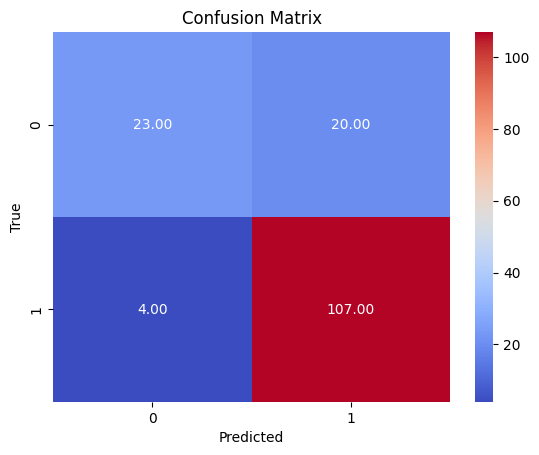

In [28]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [29]:
#import decision tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

#Predicting the test set result  
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [30]:
cm = confusion_matrix(y_test, y_pred_dtc)
acs = accuracy_score(y_test, y_pred_dtc)
cm, acs

(array([[27, 16],
        [37, 74]]),
 0.6558441558441559)

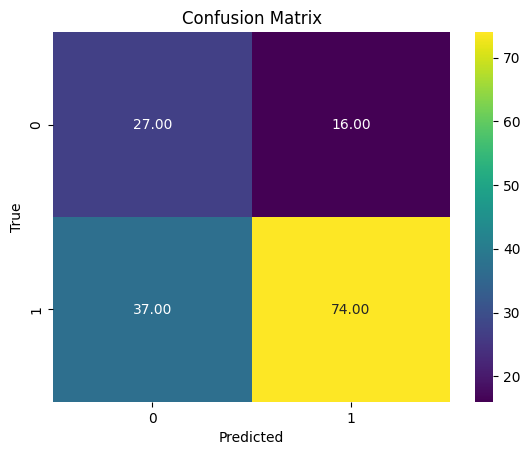

In [31]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='viridis') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [32]:
# Fitting Decision Tree classifier to the training set 
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train, y_train) 

y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [33]:
cm = confusion_matrix(y_test, y_pred_rfc)
acs = accuracy_score(y_test, y_pred_rfc)
cm, acs

(array([[25, 18],
        [20, 91]]),
 0.7532467532467533)

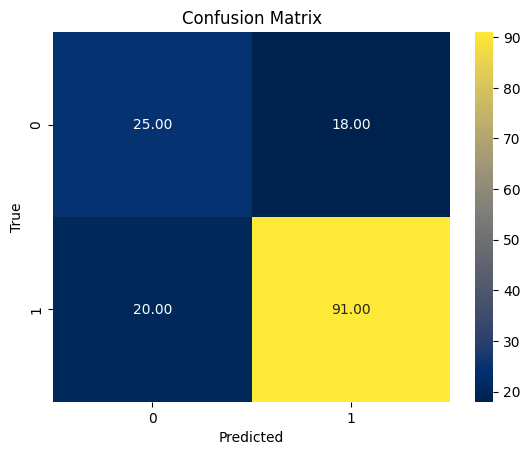

In [34]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='cividis') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [35]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [36]:
cm = confusion_matrix(y_test, y_pred_nb)
acs = accuracy_score(y_test, y_pred_nb)
cm, acs

(array([[ 23,  20],
        [  6, 105]]),
 0.8311688311688312)

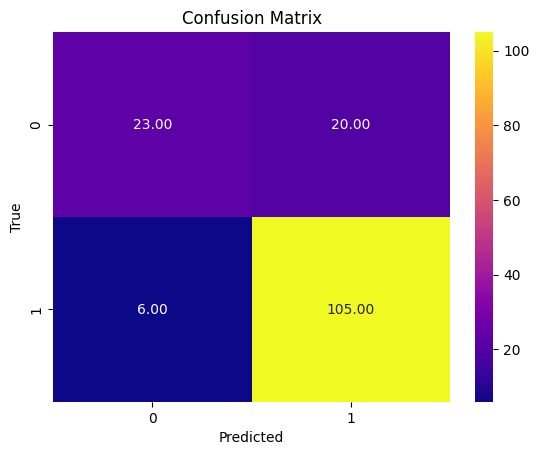

In [37]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='plasma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbor(KNN)

In [38]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [39]:
cm = confusion_matrix(y_test, y_pred_knn)
acs = accuracy_score(y_test, y_pred_knn)
cm, acs

(array([[ 22,  21],
        [  8, 103]]),
 0.8116883116883117)

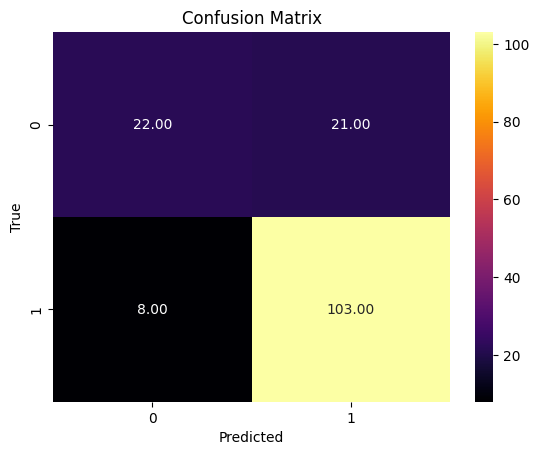

In [40]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='inferno') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine(svm)

In [41]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)  

y_pred_svc = svc.predict(x_test)
y_pred_svc

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [42]:
cm = confusion_matrix(y_test, y_pred_svc)
acs = accuracy_score(y_test, y_pred_svc)
cm, acs

(array([[ 22,  21],
        [  4, 107]]),
 0.8376623376623377)

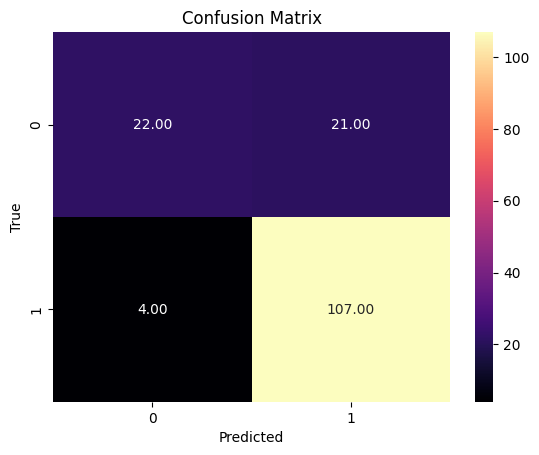

In [43]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Logistic Regression is best for this